## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

%matplotlib inline

## Creating Classlabels
- The Labels were obtained by Metadata.
- Short Hand Notations were created manually where it seemed fit.

In [2]:
column_names = [
'Class',
'Alcohol',
'Malic acid',
'Ash',
'Alcalinity',
'Magnesium' ,
'Total_Phenols',
'Flavanoids',
'Nonflavanoid_Phenols',
'Proanthocyanins',
'Color_Intensity',
'Hue',
'OD',
'Proline']

## Importing Dataset

In [3]:
df = pd.read_csv('wine.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
df.columns = column_names

In [5]:
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## Check for Missing Values

In [6]:
df.isna().sum(axis=0)

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity              0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD                      0
Proline                 0
dtype: int64

- No Missing Values Found

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity            178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total_Phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid_Phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color_Intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Checking Relationships

<AxesSubplot:>

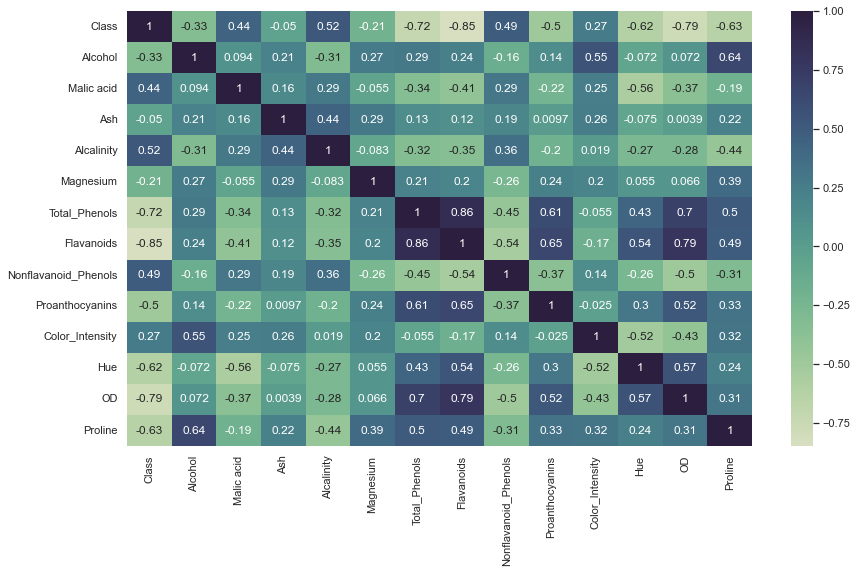

In [8]:
df_corr = df.corr()
sns.set(rc = {'figure.figsize':(14,8)})
sns.heatmap(data=df_corr, 
            annot=True, 
            cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True))

In [ ]:
sns.set(rc = {'figure.figsize':(50,50)})
sns.pairplot(data=df,
             hue = 'Class',
             palette=sns.cubehelix_palette(n_colors=3),
             corner = True
             )

### Correlations with Class
- Few Variables have a good correlation with the final variable that we aim to predict, that is Class
- The Plot Indicates a visible decision boundaries.  

### Non Linear Decision Boundaries
- The Boundaries are Indicated to be Non-Linear.
- Perhaps a KNN or SVC could be used but we would need to use a high dimensional Support Vector.
- This could be solved using MLP Classifier, since it excels at learning non-linear decision boundaries.  

### Outliers
- Presence of outliers is observed
- It would be useful to trim outliers when training using standard machine learning algorithms
- MLP should do a good job of automatically ignoring these outliers (or noise).  

### Multicollinearity
- We do observe multicollinearity.
- At this point, I should opt for a Variance Inflation Factor Analysis to aim and solve this issue.
- But Once Again, my MLP model should be reasonably good at overcoming this.

## Building Model Pipelines  
### Scaler
- Since all the data is numeric, I will use a simple scaler to scale all my data.
- Scaling of data should help speed up computations and speed up learning.

### Multi Layer Perceptron
- As mentioned above, I use a MLP for classifying.
- Given the small size of dataset, it is important that I keep my Neural Network simple so it does not overfit the dataset.
- Model has 3 layers ( 1 Input , 1 Hidden , 1 Output).
- Input layer has 13 Input Neurons
- Hidden layer has 13 Densely Connected Neurons
- Output layer has 3 Neurons for 3 Classes

In [ ]:
model = Pipeline([
    ('Scaler',StandardScaler()),
    ('MLPClassifier',MLPClassifier(
                                    hidden_layer_sizes=(len(df.columns)-1,),
                                    random_state=42,
                                    learning_rate_init=0.01,
                                    max_iter=500,
                                    ))
])

In [ ]:
X = df.drop(columns='Class')
y = df['Class']

In [ ]:
X.head()

## Train Test Split

In [ ]:
X_train , X_test , y_train , y_test = train_test_split(X,y,train_size=0.7,random_state=42)

## Model Training

In [ ]:
scores = cross_val_score(estimator=model,
                         X = X_train,
                         y = y_train,
                         cv=10)

In [ ]:
print("Average Accuracy over 10 Cross Folds is : {0:.2f}%".format(100*scores.mean()))

In [ ]:
scores

## Model Fitting

In [ ]:
model.fit(X_train,y_train)

## Model Evaluation

In [ ]:
print("Accuracy over Test Set is : {0:.2f}%".format(100*model.score(X_test,y_test)))

## Performance Metrics

In [ ]:
cm = confusion_matrix(y_true=y_test, 
                      y_pred=model.predict(X_test))
sns.set_style({'axes.grid' : False})
sns.set(rc = {'figure.figsize':(10,5)})
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
print(classification_report(y_test, y_pred = model.predict(X_test), labels = [2,4],zero_division=0,))

## Model Loss Curve

In [ ]:
loss_curve = model['MLPClassifier'].loss_curve_
sns.lineplot(data = loss_curve)

- Training plateaued after 60 iterations.
- This is to be expected given the small size of dataset

## Model Weights & Bias

In [ ]:
model_wts = model['MLPClassifier'].coefs_
bias = model_wts[1]
wts = model_wts[0]

## Model Bias Terms for 3 Layers

In [ ]:
bias

## Model Weights for 13 Neurons of Hidden layer

In [ ]:
wts

In [ ]:
wts.shape